# How well do jobs and skills pay for Data Analysts?

### Methology
    1. Evaluate median salary for top 6 data jobs
    2. Find median salary per skill for Data Analysts
    3. Visualize for highest paying skills and most demanded skills

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\91735\Anaconda3\envs\python_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_india=df[df['job_country']=='India'].dropna(subset=['salary_year_avg'])

In [3]:
job_titles=df_india['job_title_short'].value_counts().head(6).index.tolist()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [4]:
df_india_top6=df[df['job_title_short'].isin(job_titles)]

In [5]:
job_order=df_india_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.to_list()
job_order

['Senior Data Engineer',
 'Data Scientist',
 'Data Engineer',
 'Machine Learning Engineer',
 'Software Engineer',
 'Data Analyst']

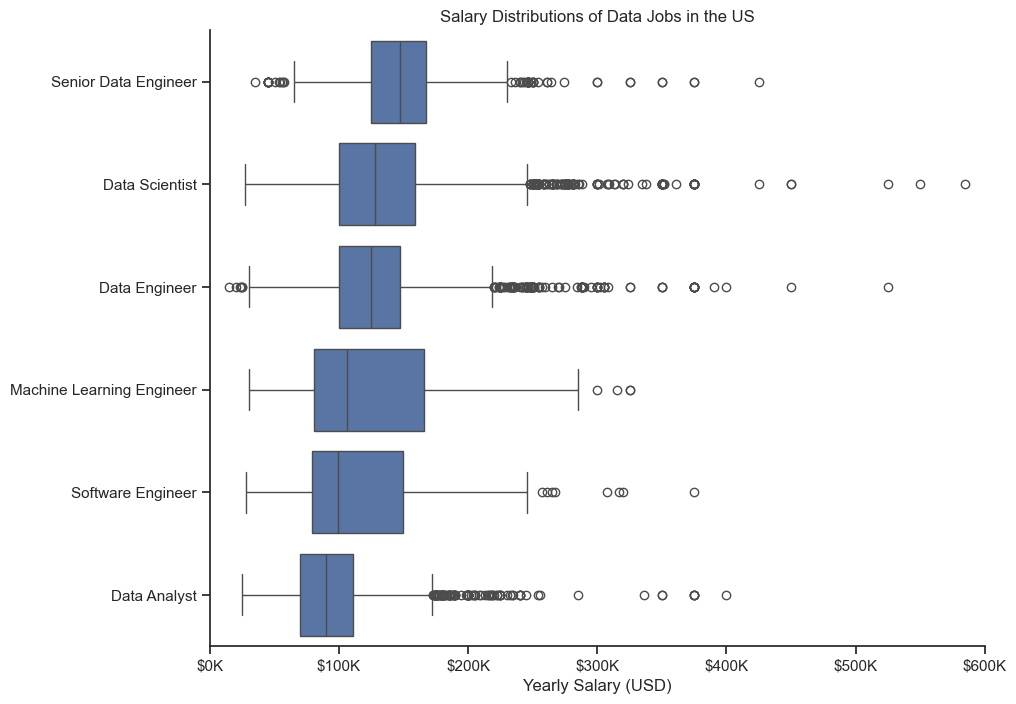

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_india_top6,x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Comparing The Highest Paid Skills and Most Demanded Skills

In [9]:
df_da_india=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()

In [12]:
df_da_india=df_da_india.dropna(subset='salary_year_avg')
df_da_india_exploded=df_da_india.explode('job_skills')
highest_paid_skills=df_da_india_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)
highest_paid_skills

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [16]:
most_demanded_skill=df_da_india_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10)
most_demanded_skill.sort_values(by='median',ascending=False,inplace=True)
most_demanded_skill

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


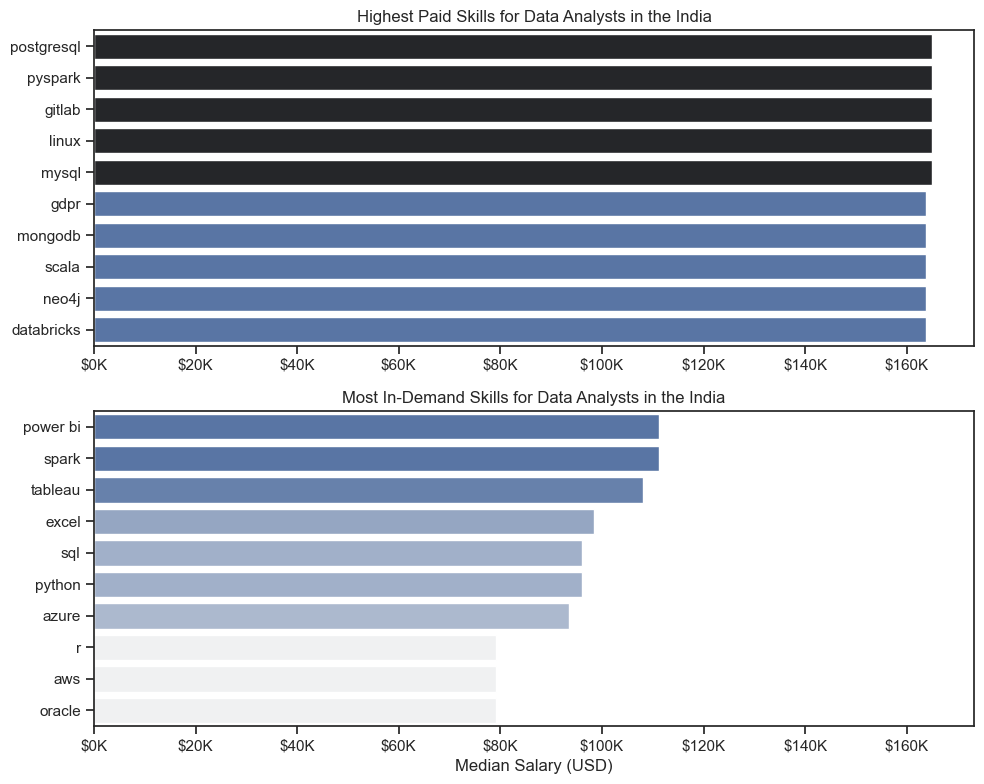

In [18]:
fig, ax = plt.subplots(2, 1,figsize=(10,8))  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=highest_paid_skills, x='median', y=highest_paid_skills.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Highest Paid Skills for Data Analysts in the India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=most_demanded_skill, x='median', y=most_demanded_skill.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()

ax[1].set_title('Most In-Demand Skills for Data Analysts in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()